# Dowloading data
We'll use a shell command to download the zipped data, unzip it into are working directory (folder).

In [1]:
!wget "https://docs.google.com/uc?export=download&id=1h3YjfecYS8vJ4yXKE3oBwg3Am64kN4-x" -O temp.zip && unzip  -o temp.zip && rm temp.zip

--2020-10-25 09:30:20--  https://docs.google.com/uc?export=download&id=1h3YjfecYS8vJ4yXKE3oBwg3Am64kN4-x
Resolving docs.google.com (docs.google.com)... 64.233.189.113, 64.233.189.139, 64.233.189.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e3jqdbq6atsag8b761gsqnoevc5g576q/1603618200000/05823673623161676158/*/1h3YjfecYS8vJ4yXKE3oBwg3Am64kN4-x?e=download [following]
--2020-10-25 09:30:21--  https://doc-0g-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e3jqdbq6atsag8b761gsqnoevc5g576q/1603618200000/05823673623161676158/*/1h3YjfecYS8vJ4yXKE3oBwg3Am64kN4-x?e=download
Resolving doc-0g-70-docs.googleusercontent.com (doc-0g-70-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to doc-0g-70-docs.googleusercontent.com (doc-0g-70-d

# Importing and Cleaning the Data

In [2]:
import pandas as pd  # aliasing for convenience

## Importing data one file at a time

### Importing 2015 data

In [3]:
df = pd.read_csv('happiness_report/2015.csv')  # loading the data to a variable called "df"
df.head(3)  # looking at the first 3 rows
df.tail(2)  # looking at the last 2 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


#### adding a year column
To add a column we can use the syntax:

`df['new_col_name'] = values`

**note**: if there was a column with the same name, it would be overwritten


In [4]:
df['year'] = 2015   # adding a column 
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


### Importing 2016 data

In [5]:
df_2016 = pd.read_csv('happiness_report/2016.csv')
df_2016['year'] = 2016

### merging (stacking vertically) the two dataframes

**note** if a column exists in one dataframe but not in the other, the values for the latter will be set to NaN (empty value)

In [6]:
list_of_df_to_merge = [df, df_2016]
df_merged = pd.concat(list_of_df_to_merge)

df_merged

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,3.404,3.564
153,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,3.288,3.432
154,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.192,3.414
155,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,2.936,3.202


## Interaction with the filesystem

In [7]:
# python library for OperatingSystem interaction
import os  

# list of files under the speficied folder
os.listdir('happiness_report')  

['2018.csv', '2015.csv', '2017.csv', '2019.csv', '2016.csv']

In [8]:
# getting the full path given the folder and file
os.path.join('happiness_report','2019.csv')  

'happiness_report/2019.csv'

## Loading and combining data from all files

We will:
- initialise an empty list of dataframes
- loop over the content of the `happiness_report` folder
  - get the filepath from the filename and folder name
  - load the data from the filepath
  - add a column to the dataframe so we can keep track of which file the data belongs to
  - add the dataframe to the list
- merge all the dataframes (vertically)

In [9]:
fld_name = 'happiness_report'
df_list = []
for filename in os.listdir(fld_name):
  filepath = os.path.join(fld_name, filename)
  df = pd.read_csv(filepath)
  
  print(filename, ':', df.columns)   # printing the column name for the file
  df['filename'] = filename
  df_list.append(df)

df_merged = pd.concat(df_list)

2018.csv : Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2015.csv : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2017.csv : Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2019.csv : Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity'

## Data cleaning
Because of inconsistency over the years of reporting, we need to do some data cleaning:
- we want a `year` column which we can get from the filename
- there are different naming for the Happiness score over the years: `Happiness Score`, `Happiness.Score`, `Score`. We want to unify them into one column.
- the country column has the same issue: `Country`, `Country or region`

In [10]:
# `filename` column is a text (string) column, so we can use string methods to edit it
column_of_string_pairs = df_merged['filename'].str.split('.')  # '2015.csv' is now ['2015', 'csv']

# selecting only the fist element for each list
column_year_string = column_of_string_pairs.str[0]  # ['2015', 'csv'] is now '2015'

# converting the string to an integer (number)
column_of_years = (column_year_string).astype(int)  # '2015' (string) is now 2015 (number)

df_merged['year'] = column_of_years

To fix the issue of change in naming, we can use:

`colA.fillna(colB)`

which checks if there are any empty valus in `colA` and fills them with the values in `colB` for the same row.


In [11]:
#  checks if there are any empty valus in colA and fills them with the values in colB for the same row
df_merged['Happiness Score'] = df_merged['Happiness Score'].fillna(df_merged['Happiness.Score']).fillna(df_merged['Score'])
df_merged['Country'] = df_merged['Country or region'].fillna(df_merged['Country'])

## Data Reshaping and Plotting

### Trends of Happiness and Generosity over the years
We'll:
- select only the columns we care about
- group the data by `year` and take the mean
- plot the Happiness and Generosity (in separate plots)

In [12]:
df_subset = df_merged[['year', 'Happiness Score', 'Generosity']]
mean_by_year = df_subset.groupby('year').mean()
mean_by_year

,Happiness Score,Generosity
year,,
2015,5.375734,0.237296
2016,5.382185,0.242635
2017,5.354019,0.246883
2018,5.375917,0.181006
2019,5.407096,0.184846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88fbb15a20>,
      dtype=object)

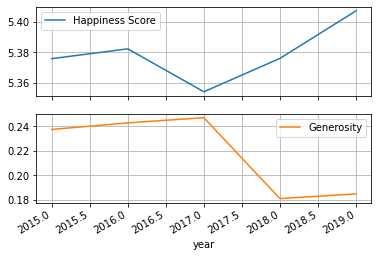

In [13]:
mean_by_year.plot(subplots=True, grid=True)
# `subplots=True` will plot the two columns in two separate charts
# `grid=True` will add the axis grid in the background

### Average Generosity and Happiness by year AND Country
We'll:
- select only the columns we care about
- group the data by `Country` and `year`
- take the mean 

In [14]:
df = df_merged[['year', 'Happiness Score', 'Generosity', 'Country']]
mean_by_country_and_year = df.groupby(['Country', 'year']).mean()
mean_by_country_and_year

Happiness Score  Generosity
Country     year                             
Afghanistan 2015            3.575    0.365100
            2016            3.360    0.312680
            2017            3.794    0.311871
            2018            3.632    0.191000
            2019            3.203    0.158000
...                           ...         ...
Zimbabwe    2015            4.610    0.189870
            2016            4.193    0.185030
            2017            3.875    0.189143
            2018            3.692    0.132000
            2019            3.663    0.151000

[782 rows x 2 columns]

#### Finding the countries and years with highest and lowest Happiness

In [15]:
mean_by_country_and_year['Happiness Score'].idxmax() # highest

('Finland', 2019)

In [16]:
mean_by_country_and_year['Happiness Score'].idxmin() # lowest

('Central African Republic', 2017)

#### Happiness by Country and Year

In [17]:
happiness_column = mean_by_country_and_year['Happiness Score'] 

# turning the single column with 2d-index into a table by moving the inner index to columns
happiness_table = happiness_column.unstack()
happiness_table

year,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Albania,4.959,4.655,4.644,4.586,4.719
Algeria,5.605,6.355,5.872,5.295,5.211
Angola,4.033,3.866,3.795,3.795,NaN
Argentina,6.574,6.650,6.599,6.388,6.086
...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707
Vietnam,5.360,5.061,5.074,5.103,5.175
Yemen,4.077,3.724,3.593,3.355,3.380


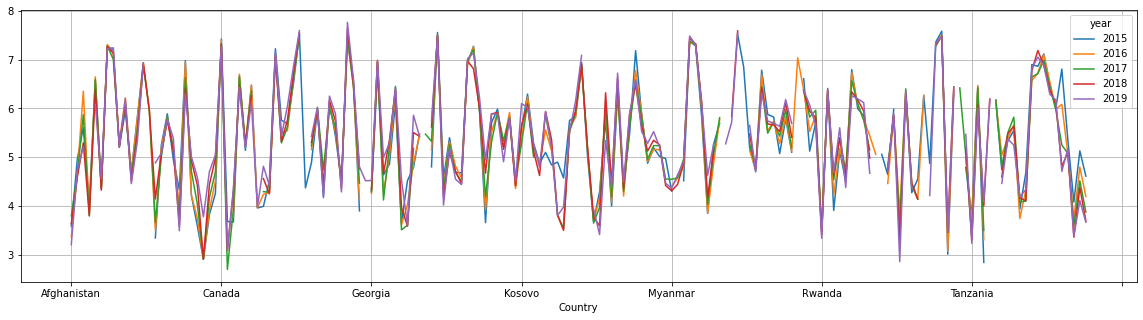

In [18]:
# for each year, plotting the values in each country
happiness_table.plot(figsize=(20,5),grid=True)

# (FYI) Interactive Chart
You can also create interactive charts by using a different library (bokeh).

for more examples: https://colab.research.google.com/notebooks/charts.ipynb

In [19]:
uk_happiness = happiness_column['United Kingdom']

In [20]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

In [21]:
x = uk_happiness.index
y = uk_happiness.values
fig = figure(title="UK Happiness", x_axis_label='x', y_axis_label='y')
fig.line(x, y, legend_label="UK", line_width=2)
show(fig)